# Diamond Price Predictor using Linear Regression

### About Dataset
This is a dataset that includes 9 observations about the characteristics of each unique diamond, as well as the price.

* Carat- Carat weight of the diamond
* Cut - The cut rating of the diamond
* Color - The color rating of the diamond
* Clarity - The clarity rating of the diamond
* Table - The table width of the diamond
* Depth- The percentage of depth of the diamond
* Price - The price (in USD) of the diamond
* X- X dimension of the diamond
* Y- Y dimension of the diamond
* Z- Z dimension of the diamond

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

from sklearn import metrics 

In [3]:
df = pd.read_csv('diamonds.csv')

### Inspection

In [4]:
# Get first 5 data items
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
# Get last 5 data items
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [6]:
# Get 10 sample data from dataset
df.sample(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
33020,33021,0.33,Ideal,E,VVS2,61.2,56.0,814,4.44,4.48,2.73
1775,1776,0.72,Ideal,G,SI1,61.8,56.0,3048,5.70,5.76,3.55
41826,41827,0.31,Ideal,D,IF,61.1,56.0,1251,4.39,4.42,2.69
19250,19251,1.32,Ideal,F,VS2,62.3,57.0,7983,7.06,6.97,4.37
29203,29204,0.44,Good,J,VS1,63.1,57.0,694,4.83,4.87,3.06
16516,16517,1.00,Premium,E,VS2,60.0,60.0,6600,6.43,6.43,3.89
41652,41653,0.59,Very Good,H,SI1,61.8,56.0,1239,5.39,5.43,3.35
36446,36447,0.31,Ideal,D,VS2,62.1,54.0,942,4.37,4.33,2.70
28083,28084,0.30,Premium,D,SI1,58.8,57.0,662,4.44,4.40,2.60
6704,6705,0.36,Premium,J,SI1,61.6,60.0,410,4.54,4.58,2.81


In [7]:
# Get shape of the dataset
df.shape

(53940, 11)

* The dataset has 53940 observations with 11 features/columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


* Based on the info above, there are no null values in the database

In [9]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [10]:
# Checking for duplicates
df.duplicated().sum()

0

* There are no duplicate values in the dataset

Now, to remove the Unnamed column in the dataset

In [11]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [12]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Exploratory Data Analysis

In [13]:
df.corr(numeric_only=True)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


Using a heatmap to visualize the correlation columns between all numeric values

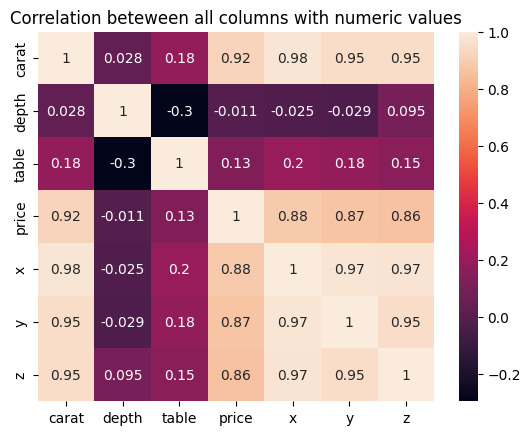

In [14]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title('Correlation beteween all columns with numeric values')
plt.show()

Get unique values for columns

In [15]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [16]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [17]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

### Univariate analyisis: Carat

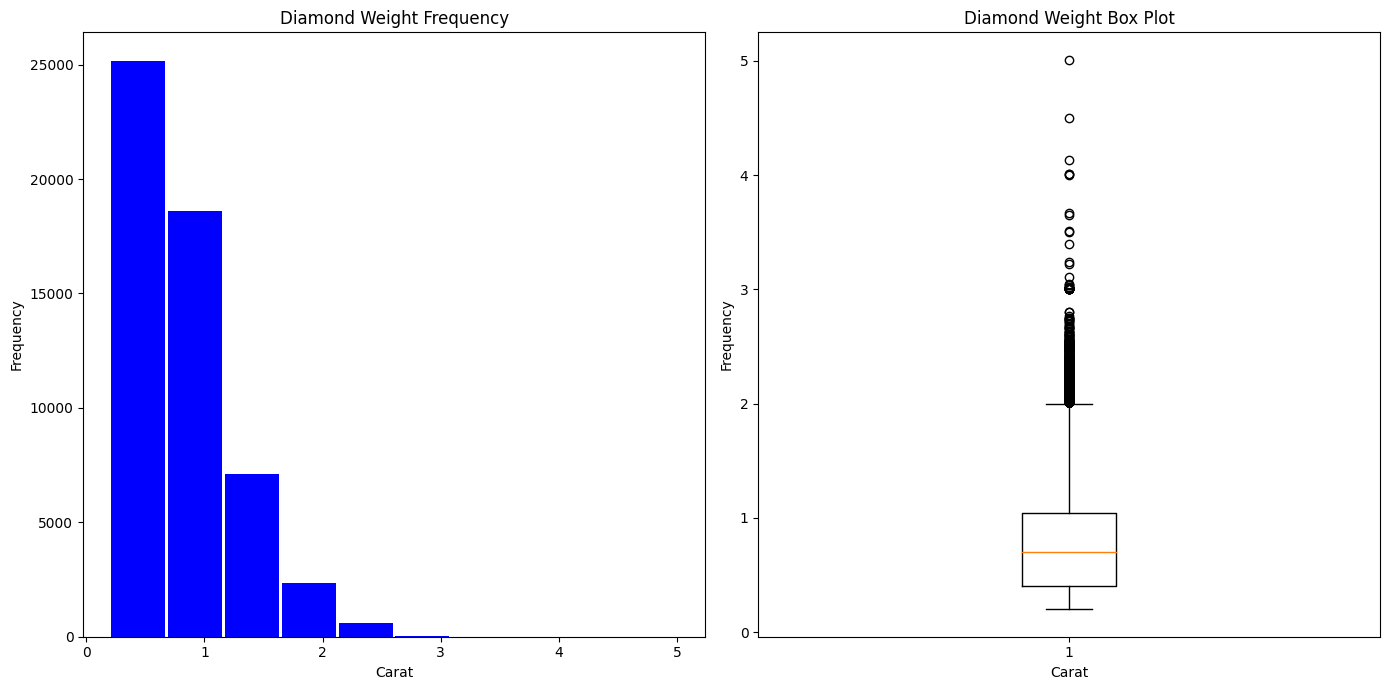

In [18]:
fig, ax = plt.subplots(ncols=2, figsize=(14, 7))

# Access individual ax using indexing
ax[0].hist(df['carat'], rwidth=0.95, color='blue')
ax[0].set_xlabel('Carat')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Diamond Weight Frequency')

ax[1].boxplot(df['carat'])
ax[1].set_xlabel('Carat')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Diamond Weight Box Plot')

plt.tight_layout()
plt.show()

### Univariate analyisis: Depth

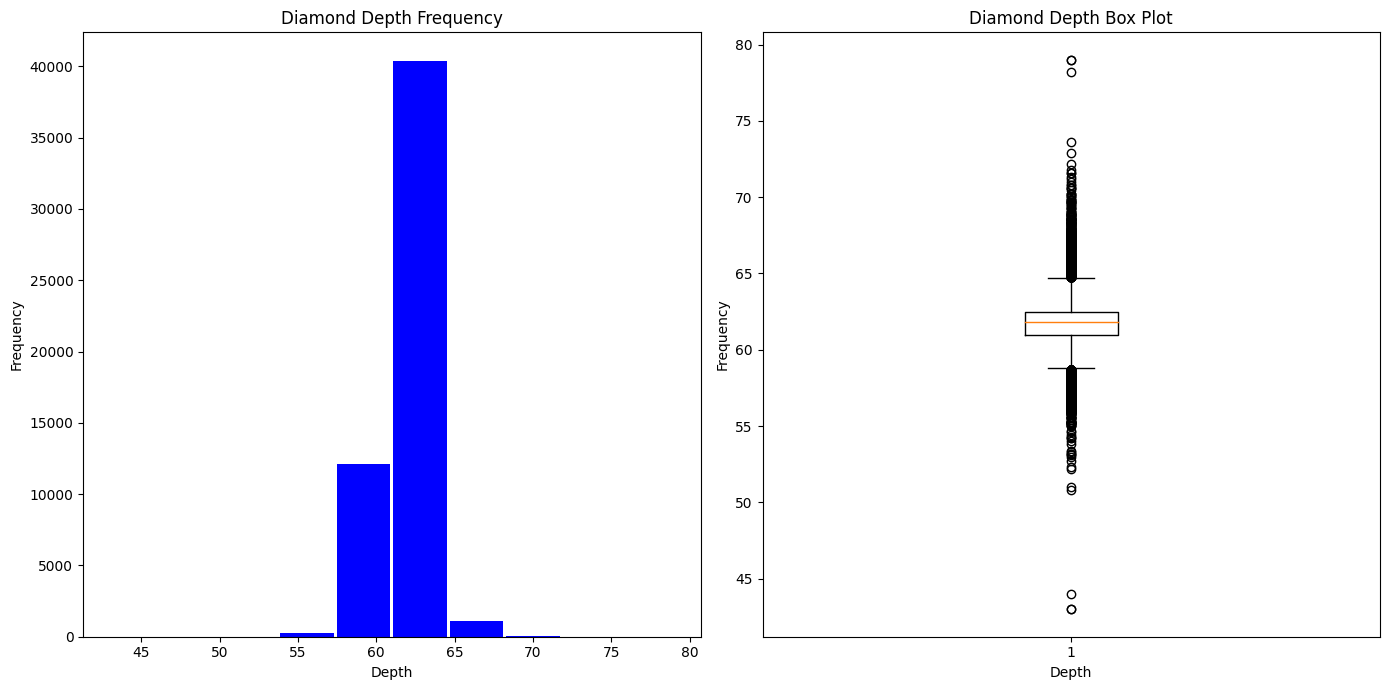

In [19]:
fig, ax = plt.subplots(ncols=2, figsize=(14, 7))

# Access individual ax using indexing
ax[0].hist(df['depth'], rwidth=0.95, color='blue')
ax[0].set_xlabel('Depth')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Diamond Depth Frequency')

ax[1].boxplot(df['depth'])
ax[1].set_xlabel('Depth')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Diamond Depth Box Plot')

plt.tight_layout()
plt.show()

### Univariate Analysis: Table

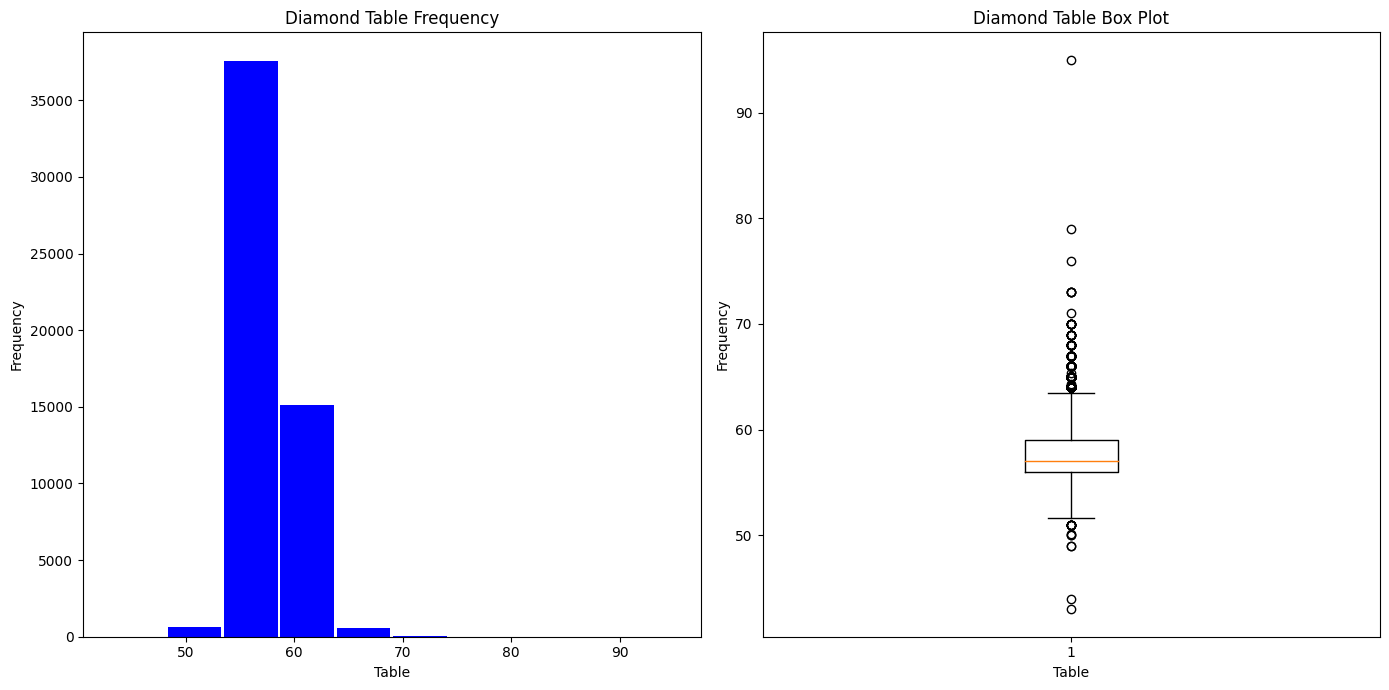

In [20]:
fig, ax = plt.subplots(ncols=2, figsize=(14, 7))

# Access individual ax using indexing
ax[0].hist(df['table'], rwidth=0.95, color='blue')
ax[0].set_xlabel('Table')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Diamond Table Frequency')

ax[1].boxplot(df['table'])
ax[1].set_xlabel('Table')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Diamond Table Box Plot')

plt.tight_layout()
plt.show()

### Univariate Analysis: Price

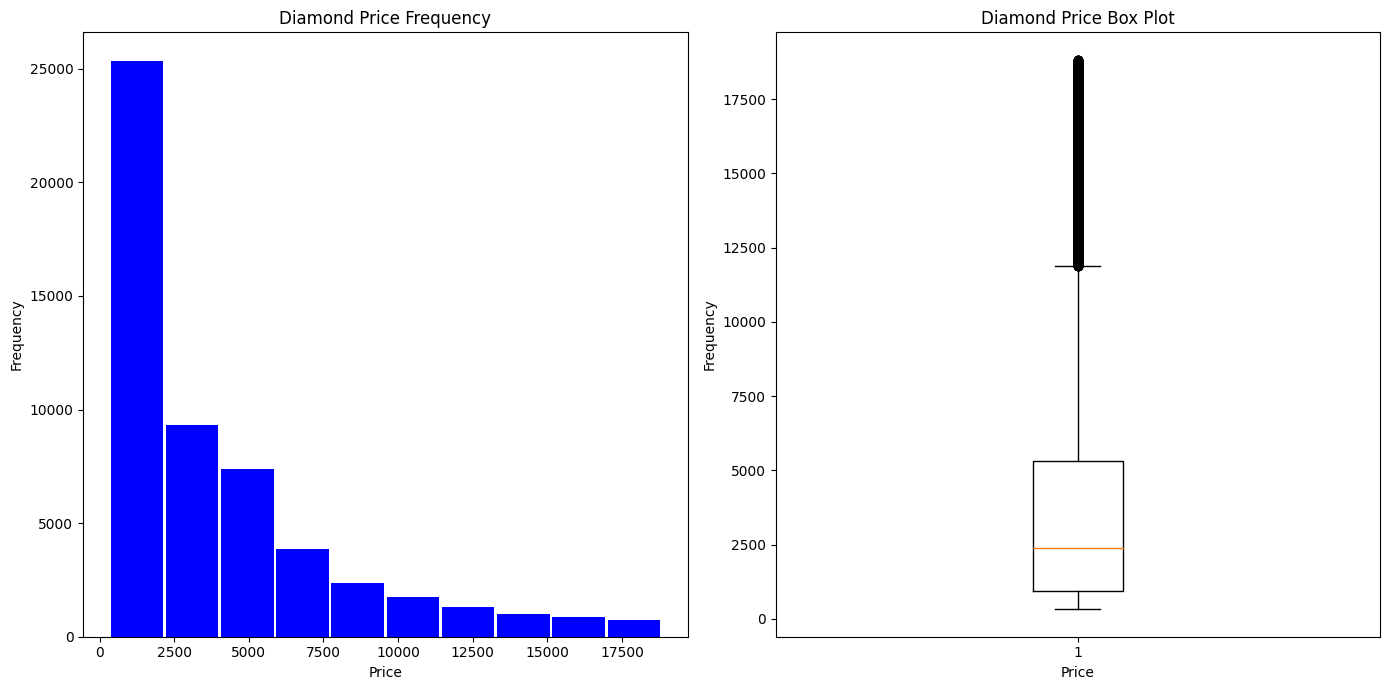

In [21]:
fig, ax = plt.subplots(ncols=2, figsize=(14, 7))

# Access individual ax using indexing
ax[0].hist(df['price'], rwidth=0.95, color='blue')
ax[0].set_xlabel('Price')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Diamond Price Frequency')

ax[1].boxplot(df['price'])
ax[1].set_xlabel('Price')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Diamond Price Box Plot')

plt.tight_layout()
plt.show()

### Bivariate Analysis

In [22]:
cut = df['cut'].value_counts().reset_index()
cut

,cut,count
0,Ideal,21551
1,Premium,13791
2,Very Good,12082
3,Good,4906
4,Fair,1610


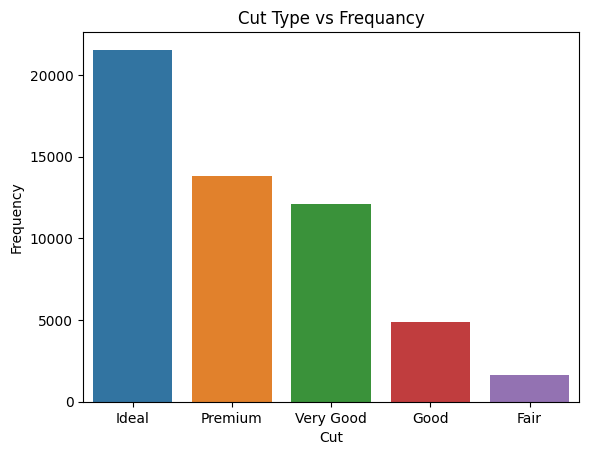

In [23]:
sns.barplot(data=cut, x=cut['cut'], y=cut['count'])
plt.title('Cut Type vs Frequancy')
plt.xlabel('Cut')
plt.ylabel('Frequency')
plt.show()

In [24]:
color = df['color'].value_counts().reset_index()
color

,color,count
0,G,11292
1,E,9797
2,F,9542
3,H,8304
4,D,6775
5,I,5422
6,J,2808


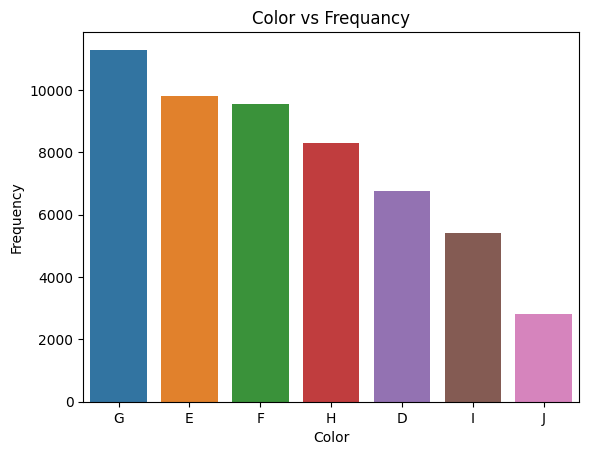

In [25]:
sns.barplot(data=color, x=color['color'], y=color['count'])
plt.title('Color vs Frequancy')
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.show()

In [26]:
clarity = df['clarity'].value_counts().reset_index()
clarity

,clarity,count
0,SI1,13065
1,VS2,12258
2,SI2,9194
3,VS1,8171
4,VVS2,5066
5,VVS1,3655
6,IF,1790
7,I1,741


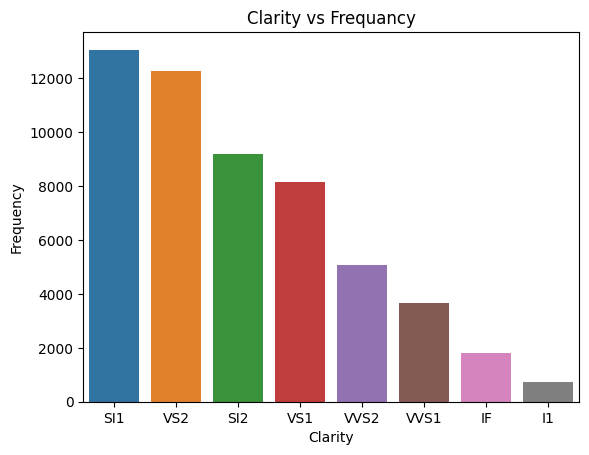

In [27]:
sns.barplot(data=clarity, x=clarity['clarity'], y=clarity['count'])
plt.title('Clarity vs Frequancy')
plt.xlabel('Clarity')
plt.ylabel('Frequency')
plt.show()

### Correlation: Carat vs Price

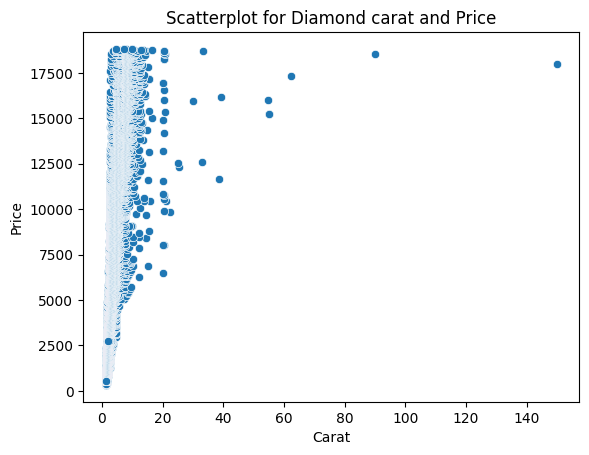

In [28]:
sns.scatterplot(df, x=np.exp(df['carat']), y=df['price'])
plt.title('Scatterplot for Diamond carat and Price')
plt.ylabel('Price')
plt.xlabel('Carat')
plt.show()

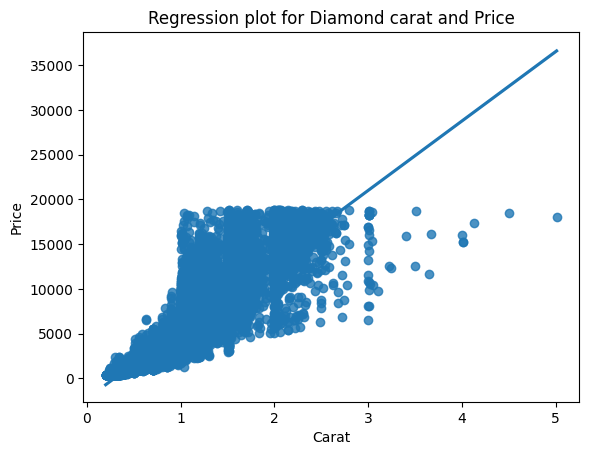

In [29]:
sns.regplot(df, x=df['carat'], y=df['price'])
plt.title('Regression plot for Diamond carat and Price')
plt.ylabel('Price')
plt.xlabel('Carat')
plt.show()

### Building Machine Learning Model

#### Data Split

* X -> Independent Features
* y -> Dependent Features

In [30]:
X = df.drop(columns=['price'])
y = df['price']

In [31]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


Convert categorical data like cut, color, clarity into numerical data using label encoding

In [32]:
cut_dummy = pd.get_dummies(X['cut'], dtype='int')
color_dummy = pd.get_dummies(X['color'], dtype='int')
clarity_dummy = pd.get_dummies(X['clarity'], dtype='int')

In [33]:
cut_dummy

,Fair,Good,Ideal,Premium,Very Good
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0
...,...,...,...,...,...
53935,0,0,1,0,0
53936,0,1,0,0,0
53937,0,0,0,0,1
53938,0,0,0,1,0


In [34]:
# Concatenate dummy data with the X
X = pd.concat([X, cut_dummy, color_dummy, clarity_dummy], axis=1)
X

,carat,cut,color,clarity,depth,table,x,y,z,Fair,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,0,...,0,0,0,0,0,1,0,0,0,0


In [35]:
# Drop unwanted data
X.drop(columns=['cut', 'color', 'clarity'], inplace=True)

In [36]:
X

,carat,depth,table,x,y,z,Fair,Good,Ideal,Premium,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,5.69,5.75,3.61,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,5.66,5.68,3.56,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,6.15,6.12,3.74,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [37]:
X.shape

(53940, 26)

### Train test split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

### Linear Regression

In [39]:
l_reg = LinearRegression()

In [40]:
l_reg.fit(X_train, y_train)

LinearRegression()

In [41]:
l_reg.intercept_

5978.172766097464

In [42]:
l_reg.coef_

array([ 1.11984810e+04, -6.73444109e+01, -2.83011978e+01, -9.76563816e+02,
        9.93243397e-01, -4.74739183e+01, -5.61131853e+02, -1.11233030e+01,
        2.50500684e+02,  1.77387241e+02,  1.44367231e+02,  8.08108887e+02,
        6.16947037e+02,  5.59860549e+02,  3.51486870e+02, -1.41294870e+02,
       -6.42240098e+02, -1.55286838e+03, -3.81105185e+03,  1.50989654e+03,
       -1.44109553e+02, -1.11455603e+03,  7.70445750e+02,  4.53044724e+02,
        1.19714224e+03,  1.13918818e+03])

In [43]:
#  Make predictions using the X_test
lreg_pred = l_reg.predict(X_test)
lreg_pred

array([4915.63277945, 7592.16984539, 6140.72865109, ..., 5269.42959025,
       6973.78753035, 2315.14119936])

In [44]:
# Actual value
y_test = np.array(y_test)
y_test

array([4733, 6424, 5510, ..., 3847, 8168, 1917], dtype=int64)

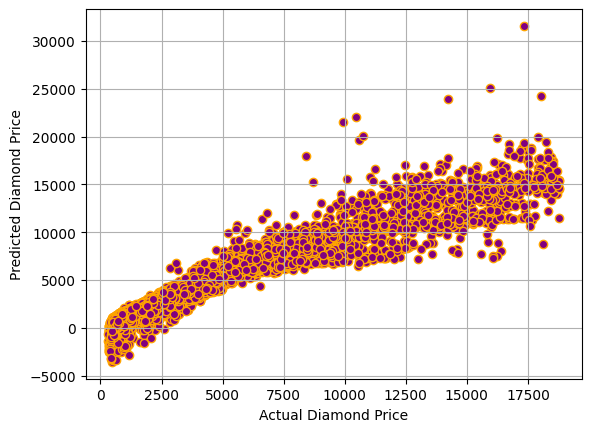

In [45]:
plt.scatter(y_test, lreg_pred, edgecolors='orange', color='purple')
plt.xlabel('Actual Diamond Price')
plt.ylabel('Predicted Diamond Price')
plt.grid()
plt.show()

In [46]:
rmse = metrics.mean_squared_error(y_test, lreg_pred)
r2 = metrics.r2_score(y_test, lreg_pred)

N = X_test.shape[0]
P = X_test.shape[1]
r2_adjusted = 1 - ((1 - r2 ) * (N - 1)) / (N - P - 1)

print(f'RMSE: {rmse:.3f}')
print(f'R2 Score: {r2:.3f}')
print(f'R2 Score: {r2_adjusted:.3f}')

RMSE: 1248486.714
R2 Score: 0.921
R2 Score: 0.921


### Ridge

In [47]:
ridge_model = Ridge(alpha=5)
ridge_model.fit(X_train, y_train)

Ridge(alpha=5)

In [48]:
ridge_pred = ridge_model.predict(X_test)
ridge_pred

array([4926.39733203, 7593.83253326, 6150.4921592 , ..., 5278.43298364,
       6981.66381911, 2318.08846719])

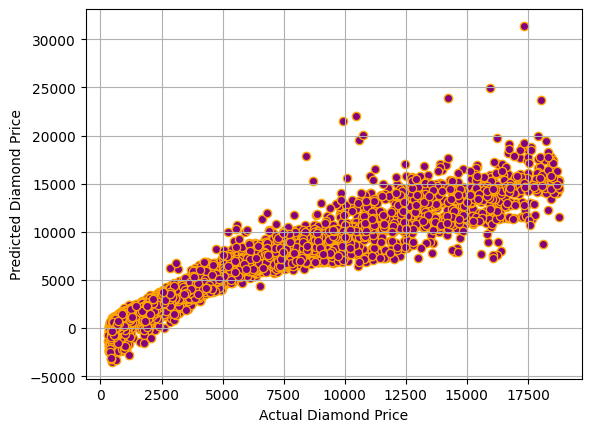

In [49]:
plt.scatter(y_test, ridge_pred, edgecolors='orange', color='purple')
plt.xlabel('Actual Diamond Price')
plt.ylabel('Predicted Diamond Price')
plt.grid()
plt.show()

In [50]:
rmse = metrics.mean_squared_error(y_test, ridge_pred)
r2 = metrics.r2_score(y_test, ridge_pred)

N = X_test.shape[0]
P = X_test.shape[1]
r2_adjusted = 1 - ((1 - r2 ) * (N - 1)) / (N - P - 1)

print(f'RMSE: {rmse:.3f}')
print(f'R2 Score: {r2:.3f}')
print(f'R2 Score: {r2_adjusted:.3f}')

RMSE: 1249499.512
R2 Score: 0.921
R2 Score: 0.921


### Lasso

In [51]:
lasso_model = Lasso(alpha=0.6)
lasso_model

Lasso(alpha=0.6)

In [52]:
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.6)

In [53]:
lasso_pred = lasso_model.predict(X_test)
lasso_pred

array([4929.50872619, 7595.58960574, 6151.59686898, ..., 5274.38541221,
       6968.40876984, 2310.49009588])

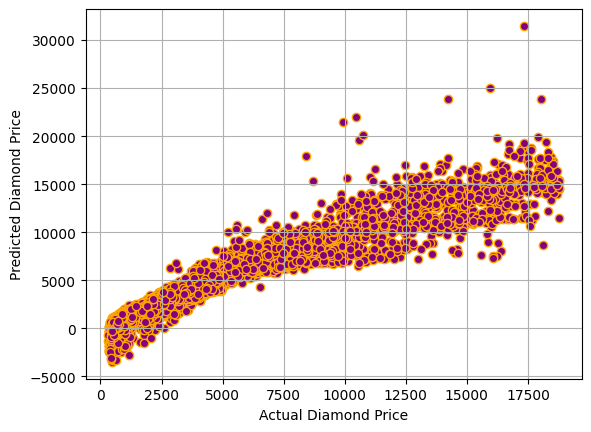

In [54]:
plt.scatter(y_test, lasso_pred, edgecolors='orange', color='purple')
plt.xlabel('Actual Diamond Price')
plt.ylabel('Predicted Diamond Price')
plt.grid()
plt.show()

In [55]:
rmse = metrics.mean_squared_error(y_test, lasso_pred)
r2 = metrics.r2_score(y_test, lasso_pred)

N = X_test.shape[0]
P = X_test.shape[1]
r2_adjusted = 1 - ((1 - r2 ) * (N - 1)) / (N - P - 1)

print(f'RMSE: {rmse:.3f}')
print(f'R2 Score: {r2:.3f}')
print(f'R2 Score: {r2_adjusted:.3f}')

RMSE: 1249385.524
R2 Score: 0.921
R2 Score: 0.921


In [56]:
X_test.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'Fair', 'Good', 'Ideal',
       'Premium', 'Very Good', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'I1', 'IF',
       'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
      dtype='object')

### Saving Model

In [57]:
import pickle

In [58]:
with open('diamond.pickle', 'wb') as file:
    pickle.dump(l_reg, file)